In [ ]:
# Step 1: Import libraries
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# Step 2: Load dataset from local file
data = pd.read_csv("insurance.csv")  # Update path if needed
print(data.head())  # Display the first few rows of the dataset
print(data.info())  # Display information about the dataset

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [11]:
# Step 3: Split features and target
X = data.drop("charges", axis=1)
y = data["charges"]

In [12]:
# Step 4: Define preprocessing
numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [13]:
# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
# Step 6: Define pipelines
lr_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

In [15]:
# Step 7: Train and evaluate
def evaluate_and_plot(name, pipeline):
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    
    print(f"{name} Results:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²: {r2:.4f}")
    
    # Visualization
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=preds, alpha=0.6)
    plt.plot([0, max(y_test)], [0, max(y_test)], '--', color='red')
    plt.xlabel("Actual Charges")
    plt.ylabel("Predicted Charges")
    plt.title(f"{name} - Actual vs Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Linear Regression Results:
  RMSE: 5796.28
  R²: 0.7836


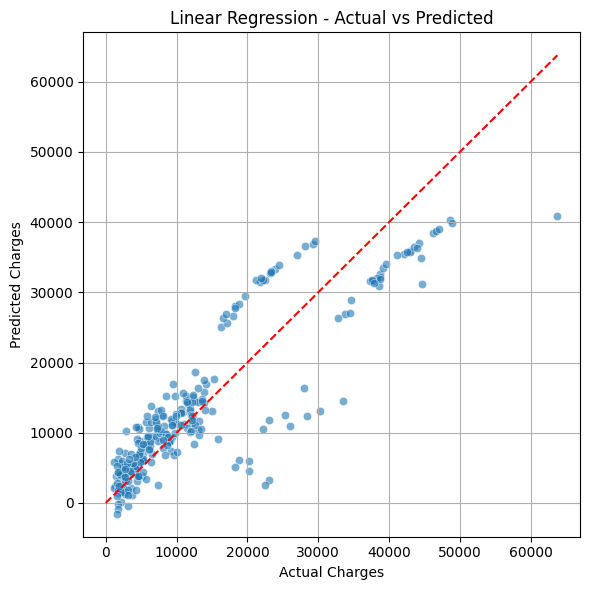

Random Forest Results:
  RMSE: 4567.78
  R²: 0.8656


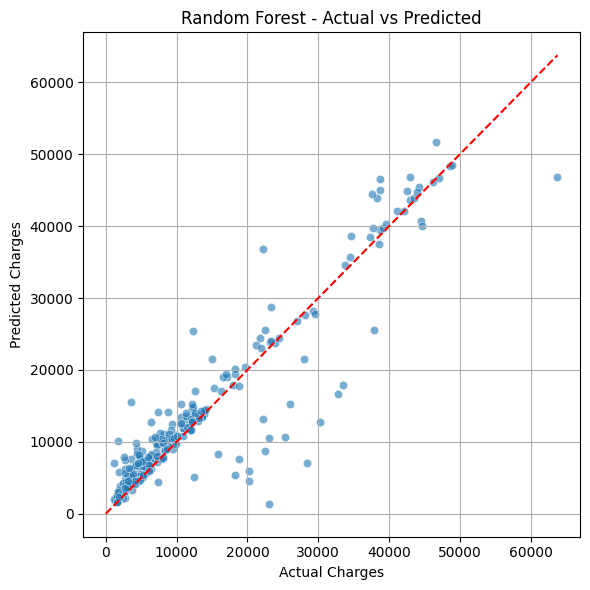

In [16]:
# Step 8: Run evaluation
evaluate_and_plot("Linear Regression", lr_pipeline)
evaluate_and_plot("Random Forest", rf_pipeline)